In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import pandas as pd
import numpy as np
import scipy as sp
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import arviz as az
import seaborn as sns

import kinesis as kn
import gapipes as gp

kn.set_mpl_style()

In [2]:
def savefig(fig, basename, **kwargs):
    fig.savefig("../report/plots/plot-comparisons-rtid/{}.pdf".format(basename), **kwargs)

In [6]:
df = kn.data.load_hyades_dataset()
b_c_icrs = np.array([17.13924468, 41.23189102, 13.65416937])
b0 = b_c_icrs

fit_dict = {
    "cl": kn.load_stanfit("../report/hyades-dr2-rtid/cl.pickle"),
    "tails": kn.load_stanfit("../report/hyades-dr2-rtid/tails.pickle"),
}
azfit_dict = {
    k: kn.add_transformed_posterior(az.from_pystan(v)) for k, v in fit_dict.items()
}

## Dividing at r=10pc

In [7]:
# generate a summary table of all parameters
pars = [
    "f_mem",
    "v0",
    "Sigma_gal",
    "omegax_gal",
    "omegay_gal",
    "omegaz_gal",
    "w1_gal",
    "w2_gal",
    "w3_gal",
    "w4_gal",
    "w5_gal",
    "kappa_gal",
]

# t1 = az.summary(azfit_dict["harpsRV"], pars)
# t2 = az.summary(azfit_dict["harpsRVall"], pars)
t1 = az.summary(azfit_dict["cl"], pars)
t2 = az.summary(azfit_dict["tails"], pars)

def cleantable(t):
    return t[["mean", "sd", "hpd_3%", "hpd_97%"]].drop(
        index=["Sigma_gal[1,0]", "Sigma_gal[2,0]", "Sigma_gal[2,1]"],
    )


t1, t2 = list(map(cleantable, [t1, t2]))
merged_table = pd.concat([t1, t2], axis=1).rename(
    index={
        "f_mem": r"\fmem",
        "v0[0]": "$v_{0,x}$ (ICRS)",
        "v0[1]": "$v_{0,y}$ (ICRS)",
        "v0[2]": "$v_{0,z}$ (ICRS)",
        "Sigma_gal[0,0]": "$\Sigma_{xx}$",
        "Sigma_gal[0,1]": "$\Sigma_{xy}$",
        "Sigma_gal[0,2]": "$\Sigma_{xz}$",
        "Sigma_gal[1,1]": "$\Sigma_{yy}$",
        "Sigma_gal[1,2]": "$\Sigma_{yz}$",
        "Sigma_gal[2,2]": "$\Sigma_{zz}$",
        "w1_gal": "$w_1$",
        "w2_gal": "$w_2$",
        "w3_gal": "$w_3$",
        "w4_gal": "$w_4$",
        "w5_gal": "$w_5$",
        "kappa": "$\kappa$",
        'omegax_gal':'$\omega_x$',
        'omegay_gal':'$\omega_y$',
        'omegaz_gal':'$\omega_z$',
        'kappa_gal':'$\kappa$'
    },
    columns={
        'hpd_3%':'hpd 3\%','hpd_97%':'hpd 97\%'
    }
)
# print(merged_table.iloc[:,:].T.to_csv())
merged_table

,mean,sd,hpd 3\%,hpd 97\%,mean,sd,hpd 3\%,hpd 97\%
\fmem,0.953,0.013,0.929,0.977,0.855,0.012,0.832,0.878
"$v_{0,x}$ (ICRS)",-6.086,0.028,-6.140,-6.033,-5.910,0.047,-5.995,-5.821
"$v_{0,y}$ (ICRS)",45.628,0.051,45.529,45.722,45.381,0.114,45.161,45.589
"$v_{0,z}$ (ICRS)",5.517,0.025,5.470,5.564,5.594,0.040,5.521,5.671
$\Sigma_{xx}$,0.200,0.061,0.088,0.314,3.221,0.340,2.561,3.838
$\Sigma_{xy}$,-0.023,0.058,-0.123,0.087,1.784,0.174,1.458,2.109
$\Sigma_{xz}$,0.001,0.046,-0.082,0.084,0.552,0.066,0.428,0.676
$\Sigma_{yy}$,0.147,0.013,0.124,0.172,1.408,0.107,1.213,1.607
$\Sigma_{yz}$,-0.025,0.024,-0.068,0.021,0.271,0.038,0.202,0.344
$\Sigma_{zz}$,0.141,0.042,0.064,0.215,0.311,0.026,0.260,0.358


## Dividing at r=9pc

In [4]:
# generate a summary table of all parameters
pars = [
    "f_mem",
    "v0",
    "Sigma_gal",
    "omegax_gal",
    "omegay_gal",
    "omegaz_gal",
    "w1_gal",
    "w2_gal",
    "w3_gal",
    "w4_gal",
    "w5_gal",
    "kappa_gal",
]

# t1 = az.summary(azfit_dict["harpsRV"], pars)
# t2 = az.summary(azfit_dict["harpsRVall"], pars)
t1 = az.summary(azfit_dict["cl"], pars)
t2 = az.summary(azfit_dict["tails"], pars)

def cleantable(t):
    return t[["mean", "sd", "hpd_3%", "hpd_97%"]].drop(
        index=["Sigma_gal[1,0]", "Sigma_gal[2,0]", "Sigma_gal[2,1]"],
    )


t1, t2 = list(map(cleantable, [t1, t2]))
merged_table = pd.concat([t1, t2], axis=1).rename(
    index={
        "f_mem": r"\fmem",
        "v0[0]": "$v_{0,x}$ (ICRS)",
        "v0[1]": "$v_{0,y}$ (ICRS)",
        "v0[2]": "$v_{0,z}$ (ICRS)",
        "Sigma_gal[0,0]": "$\Sigma_{xx}$",
        "Sigma_gal[0,1]": "$\Sigma_{xy}$",
        "Sigma_gal[0,2]": "$\Sigma_{xz}$",
        "Sigma_gal[1,1]": "$\Sigma_{yy}$",
        "Sigma_gal[1,2]": "$\Sigma_{yz}$",
        "Sigma_gal[2,2]": "$\Sigma_{zz}$",
        "w1_gal": "$w_1$",
        "w2_gal": "$w_2$",
        "w3_gal": "$w_3$",
        "w4_gal": "$w_4$",
        "w5_gal": "$w_5$",
        "kappa": "$\kappa$",
        'omegax_gal':'$\omega_x$',
        'omegay_gal':'$\omega_y$',
        'omegaz_gal':'$\omega_z$',
        'kappa_gal':'$\kappa$'
    },
    columns={
        'hpd_3%':'hpd 3\%','hpd_97%':'hpd 97\%'
    }
)
# print(merged_table.iloc[:,:].T.to_csv())
merged_table

,mean,sd,hpd 3\%,hpd 97\%,mean,sd,hpd 3\%,hpd 97\%
\fmem,0.962,0.012,0.938,0.983,0.857,0.012,0.834,0.879
"$v_{0,x}$ (ICRS)",-6.084,0.029,-6.138,-6.029,-5.894,0.049,-5.984,-5.804
"$v_{0,y}$ (ICRS)",45.624,0.051,45.528,45.718,45.423,0.119,45.203,45.647
"$v_{0,z}$ (ICRS)",5.525,0.025,5.478,5.572,5.599,0.042,5.519,5.676
$\Sigma_{xx}$,0.164,0.058,0.065,0.272,3.230,0.332,2.616,3.854
$\Sigma_{xy}$,-0.030,0.058,-0.127,0.081,1.760,0.171,1.436,2.076
$\Sigma_{xz}$,0.015,0.047,-0.072,0.100,0.544,0.065,0.425,0.668
$\Sigma_{yy}$,0.147,0.013,0.121,0.171,1.368,0.106,1.184,1.586
$\Sigma_{yz}$,-0.028,0.025,-0.070,0.020,0.257,0.035,0.193,0.324
$\Sigma_{zz}$,0.165,0.043,0.087,0.246,0.298,0.024,0.250,0.341


## Mean velocity

INFO:matplotlib.texmanager:No LaTeX-compatible font found for the serif font family in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the serif font family in rcParams. Using default.


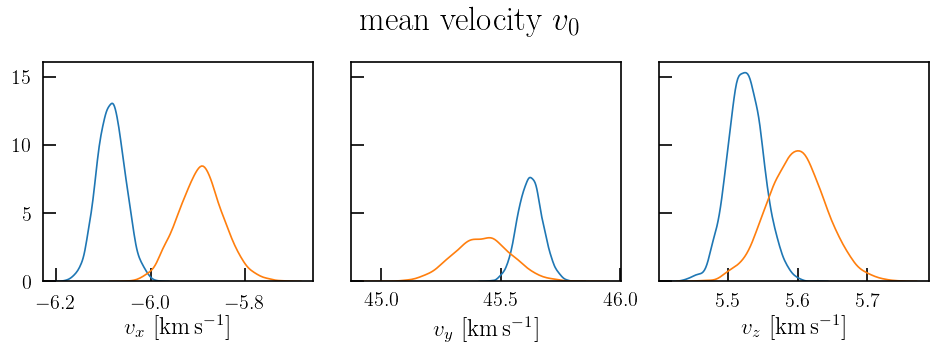

In [5]:
fig=kn.plot_mean_velocity(azfit_dict['cl'])
fig=kn.plot_mean_velocity(azfit_dict['tails'],fig=fig)

## Mean velocity - comparison to literature

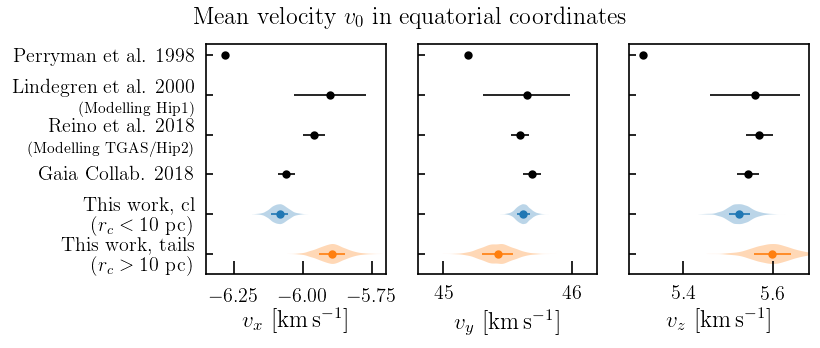

In [6]:
from io import StringIO

prev = pd.read_csv(
    StringIO(
        """
# Compile only the most relevant
label,vx,vx_sig,vy,vy_sig,vz,vz_sig
"Gaia HR",-6.059, 0.031, 45.691,0.069,5.544,0.025
"Reino et al. 2018\nModelling TGAS/Hipparcos-2",-5.96,0.04,45.60,0.07,5.57, 0.03 
"Lindegren et al. 2000\nModelling Hipparcos-1",-5.90,0.13,45.65,0.34,5.56, 0.10 
"Perryman et al. 1998",-6.28,0,45.19,0,5.31,0
"""
    ),
    skipinitialspace=True,
    comment="#",
)

v0df = pd.DataFrame(
    azfit_dict["cl"].posterior["v0"].stack(i=["chain", "draw"]).values.T,
    columns=["vx", "vy", "vz"],
)
v0df_all = pd.DataFrame(
    azfit_dict["tails"].posterior["v0"].stack(i=["chain", "draw"]).values.T,
    columns=["vx", "vy", "vz"],
)

fig, ax = plt.subplots(1, 3, figsize=(7, 3), sharey=True)
fig.suptitle("Mean velocity $v_0$ in equatorial coordinates", y=0.96)
for cax, label in zip(ax, ["vx", "vy", "vz"]):
    # cl
    cax.violinplot(v0df[label], vert=False, positions=[-1,], showextrema=False)
    cax.errorbar(
        np.median(v0df[label]),
        -1,
        xerr=[
            [np.median(v0df[label]) - np.percentile(v0df[label], 16)],
            [np.percentile(v0df[label], 84) - np.median(v0df[label])],
        ],
        marker="o",
        c="C0",
        ms=4,
    )
    # cl+tails
    cax.violinplot(v0df_all[label], vert=False, positions=[-2,], showextrema=False)
    cax.errorbar(
        np.median(v0df_all[label]),
        -2,
        xerr=[
            [np.median(v0df_all[label]) - np.percentile(v0df_all[label], 16)],
            [np.percentile(v0df_all[label], 84) - np.median(v0df_all[label])],
        ],
        marker="o",
        c="C1",
        ms=4,
    )

    cax.errorbar(
        prev[label],
        np.arange(len(prev)),
        xerr=prev["{}_sig".format(label)],
        ls="",
        marker="o",
        c="k",
        ms=4,
    )
ax[0].set_yticks([-2, -1, 0, 1, 2, 3])
ax[0].set_yticklabels(
    [
        "This work, tails\n($r_c>10~\mathrm{pc}$)",
        "This work, cl\n($r_c<10~\mathrm{pc}$)",
        "Gaia Collab. 2018",
        "Reino et al. 2018\n{\small (Modelling TGAS/Hip2)}",
        "Lindegren et al. 2000\n{\small (Modelling Hip1)}",
        "Perryman et al. 1998",
    ]
)
ax[0].set_xlim([-6.35, -5.7])
ax[1].set_xlim([44.8, 46.2])
ax[2].set_xlim([5.28, 5.68])
for cax in ax[:]:
    cax.tick_params("y", which="major", length=4)
ax[0].set_xlabel("$v_x$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1].set_xlabel("$v_y$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[2].set_xlabel("$v_z$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
fig.tight_layout(rect=[0, 0, 1, 0.93])
savefig(fig, "mean_velocity_comparison")

# Velocity dispersion

In [7]:
%run utils.ipynb

C0 cl
0 0.39825840007185503 0.0713514827697812
1 0.383243912066405 0.017290828962091963
2 0.402126585605426 0.054635769737407976
C1 tails
0 1.794826783490786 0.09238631423213628
1 1.1688779605808148 0.04533965261608023
2 0.5457384970469654 0.022221450214507926


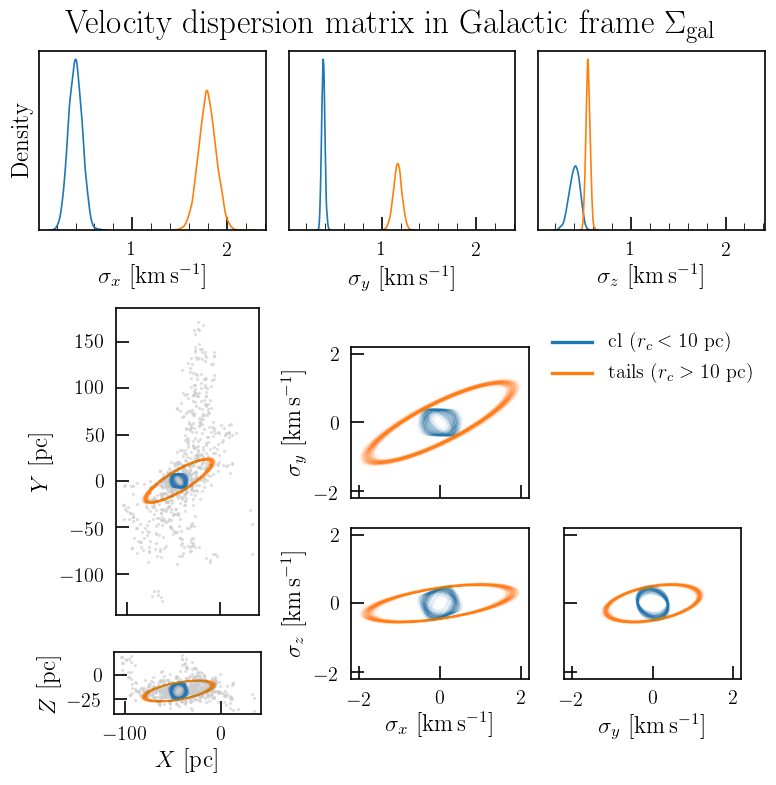

In [11]:
# Figure: posterior velocity disperion in Galactic frame
def cleanyticks(cax):
    cax.set_yticks([])
from matplotlib.lines import Line2D


fig = plt.figure(figsize=(6.5, 6.5))
ax = fig.subplots(
    2, 2, gridspec_kw=dict(top=0.55, left=0.45, right=0.95), sharex=True, sharey=True
)
plt.delaxes(ax[0, 1])

axhist = fig.subplots(
    1,
    3,
    gridspec_kw=dict(bottom=0.7, left=0.05, right=0.98, top=0.93, wspace=0.1),
    sharex=True,
)
for cax, axis in zip(axhist, ["x", "y", "z"]):
    cax.set_xlabel(r"$\sigma_{}$ [$\mathrm{{km}}\,\mathrm{{s}}^{{-1}}$]".format(axis))
    cleanyticks(cax)
axhist[0].set_ylabel("Density")

center_gal = np.array([-43.9034441, 0.17206561, -17.02724708])
scale = (
    20  # arbitrary multiplcation factor to make covar ellipse visible with positions
)
axOver = fig.subplots(
    2,
    1,
    gridspec_kw=dict(left=0.08, bottom=0.08, right=0.4, top=0.6, height_ratios=[5, 1]),
    sharex=True,
)
cdf = df.groupby(df["Member_r19"] != "other").get_group(True)
axOver[0].scatter(cdf["gx"], cdf["gy"], s=1, c="0.8", alpha=0.5)
axOver[1].scatter(cdf["gx"], cdf["gz"], s=1, c="0.8", alpha=0.5)
for cax in axOver:
    cax.set_aspect("equal")
axOver[1].set_xlabel("$X$ [pc]")
axOver[1].set_ylabel("$Z$ [pc]")
axOver[0].set_ylabel("$Y$ [pc]")

for (k, azfit), color in zip(azfit_dict.items(), ["C0", "C1", "C0", "C1"]):
    print(color, k)
    cov = azfit.posterior["Sigma_gal"].stack(i=["chain", "draw"]).values

    for i in np.random.randint(0, 4000, size=400):
        # x-y
        confidence_ellipse(
            cov[:, :, i], ax[0, 0], n_std=1, edgecolor=color, alpha=0.1, lw=0.1
        )
        confidence_ellipse(
            cov[:, :, i],
            axOver[0],
            center=center_gal[[0, 1]],
            n_std=scale,
            edgecolor=color,
            alpha=0.1,
            lw=0.1,
        )
        # x-z
        sel = np.meshgrid([0, 2], [0, 2], indexing="ij")
        confidence_ellipse(
            cov[sel[0], sel[1], i],
            ax[1, 0],
            n_std=1,
            edgecolor=color,
            alpha=0.1,
            lw=0.1,
        )
        confidence_ellipse(
            cov[sel[0], sel[1], i],
            axOver[1],
            center=center_gal[[0, 2]],
            n_std=scale,
            edgecolor=color,
            alpha=0.1,
            lw=0.1,
        )
        # y-z
        sel = np.meshgrid([1, 2], [1, 2], indexing="ij")
        confidence_ellipse(
            cov[sel[0], sel[1], i],
            ax[1, 1],
            n_std=1,
            edgecolor=color,
            alpha=0.1,
            lw=0.1,
        )

    for ii in range(3):
        #         axhist[ii].set_xlim(0, 1.6)
        axhist[ii].minorticks_on()
        axhist[ii].tick_params(axis="x", which="minor", length=4, width=0.5)
        sns.kdeplot(np.sqrt(cov[ii, ii]), ax=axhist[ii], color=color)
        print(ii, (np.sqrt(cov[ii, ii])).mean(), (np.sqrt(cov[ii, ii])).std())

ax[0, 0].axis([-2.2, 2.2, -2.2, 2.2])
# make all ticklabels positive as there is no minus dispersion?

# add a custom figure legend
custom_lines = [
    Line2D([0], [0], color="C0", lw=2),
    Line2D([0], [0], color="C1", lw=2),
]
fig.legend(
    custom_lines,
    ["cl ($r_c<10~\mathrm{pc}$)", "tails ($r_c>10~\mathrm{pc}$)"],
    loc=[0.7, 0.5],
    frameon=False,
    fontsize=12,
)

ax[1, 0].set_xlabel("$\sigma_x$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[0, 0].set_ylabel("$\sigma_y$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 1].set_xlabel("$\sigma_y$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 0].set_ylabel("$\sigma_z$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
fig.suptitle(
    "Velocity dispersion matrix in Galactic frame $\Sigma_\mathrm{gal}$", size=20
)
savefig(fig, "Sigma_gal", rasterized=True)

# Velocity gradient

In [51]:
# to normalize dv/dx
(1 * u.m / u.s / u.pc).to(u.pc / (10 * u.Myr) / u.pc)  * 2

<Quantity 0.02045424 0.1 / Myr>

In [12]:
def plot_deformed_ellipse(dvdx, r=10, n=64, ax=None, vnorm=1, center=(0, 0), **kwargs):
    """
    Deform a circle according to the 2D strain rate tensor dvdx
    
    dvdx : array, (2,2)
        (i,j) is dv_i/d_vj
    r : float
        starting radius
    n : int
        number of linspace segments of the circle
    ax : Axes
        default will be current axes
    vnorm : float
        divide dvdx by this factor
    center : 2-tuple
        center of circle
    kwargs : dict
        they are passed to plt.plot
    """
    if ax is None:
        ax = plt.gca()
    dvdx = np.array(dvdx)
    assert dvdx.shape == (2, 2), "dvdx has wrong shape"

    theta = np.linspace(0, np.pi * 2, n)
    x, y = r * np.cos(theta), r * np.sin(theta)
    pos = np.vstack((x.ravel()[None], y.ravel()[None]))
    vel = np.einsum("ij,jn->in", dvdx, pos)

    xnew = vel[0] / vnorm + x
    ynew = vel[1] / vnorm + y

    #     ax.plot(x, y)
    ax.plot(xnew + center[0], ynew + center[1], **kwargs)
    return ax

cl -24.69695876871843 20.263681984801703
tails 16.589115316106028 7.249616617189897


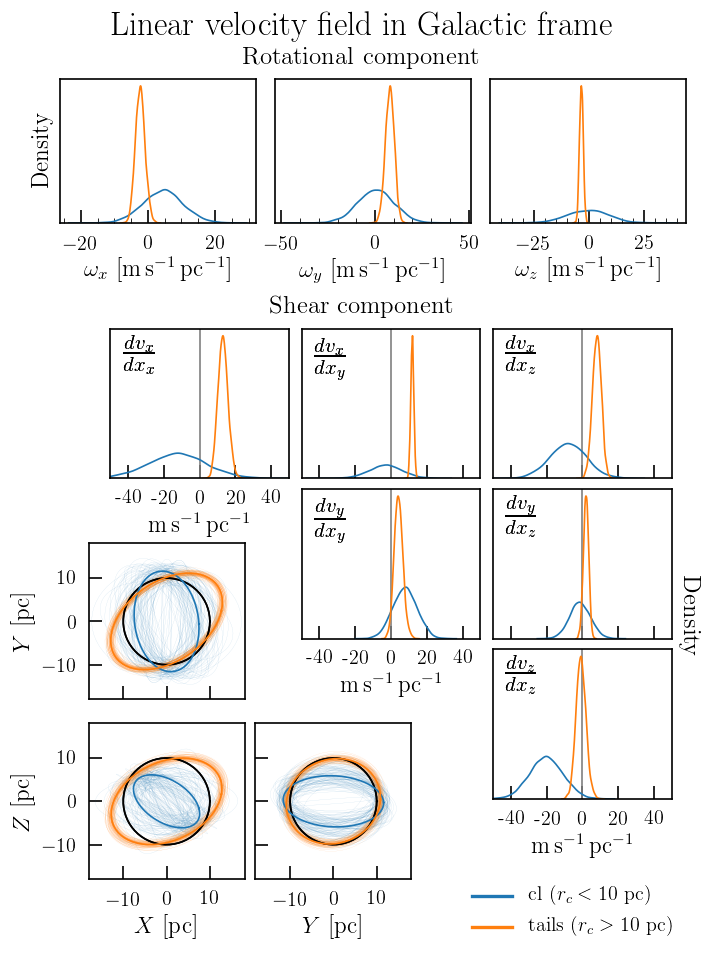

In [13]:
# Figure: posterior decomposed linear velocity field in Galactic frame
# v2 showing corner pdfs and corner deformed circles
def cleanyticks(cax):
    cax.set_yticks([])


from matplotlib.lines import Line2D


fig = plt.figure(figsize=(6, 8))
ax = fig.subplots(
    3,
    3,
    gridspec_kw=dict(
        bottom=0.16, top=0.65, left=0.15, right=0.93, wspace=0.07, hspace=0.07
    ),
    sharex=True,
    sharey=False,
)
for i, j in zip(*np.tril_indices(3, k=-1)):
    ax[i, j].set_visible(False)
for cax in ax.ravel():
    cax.axvline(0, c="0.5", lw=1)


fig.text(0.5, 0.66, "Shear component", size=15, ha="center", va="bottom")
axell = fig.subplots(
    3,
    3,
    gridspec_kw=dict(
        bottom=0.07, top=0.62, left=0.12, right=0.8, wspace=0.07, hspace=0.07
    ),
    sharex=True,
    sharey=True,
)
for i, j in zip(*np.triu_indices(3, k=0)):
    axell[i, j].set_visible(False)
axell[2, 0].set_xlabel("$X$ [pc]")
axell[2, 1].set_xlabel("$Y$ [pc]")
axell[1, 0].set_ylabel("$Y$ [pc]")
axell[2, 0].set_ylabel("$Z$ [pc]")

fig.text(0.5, 0.92, "Rotational component", size=15, ha="center", va="bottom")
axhist = fig.subplots(
    1, 3, gridspec_kw=dict(bottom=0.76, left=0.08, right=0.95, top=0.91, wspace=0.1)
)
for cax, axis in zip(axhist, ["x", "y", "z"]):
    cax.set_xlabel(
        r"$\omega_{}$ [$\mathrm{{m}}\,\mathrm{{s}}^{{-1}}\,\mathrm{{pc}}^{{-1}}$]".format(
            axis
        )
    )
    cleanyticks(cax)
axhist[0].set_ylabel("Density")

for (k, stanfit), color in zip(fit_dict.items(), ["C0", "C1", "C0", "C1"]):
    T_galactic = kn.rotate_T_to_galactic(stanfit["T_param"])
    T_sym = (T_galactic + np.transpose(T_galactic, (0, 2, 1))) * 0.5
    Tmean = T_sym.mean(axis=0)
    print(
        k,
        np.trace(T_sym, axis1=1, axis2=2).mean(),
        np.trace(T_sym, axis1=1, axis2=2).std(),
    )

    for i, j in zip(*np.triu_indices(3, k=0)):
        axis = ["x", "y", "z"]
        ax[i, j].text(
            0.07,
            0.93,
            r"$\frac{{dv_{}}}{{dx_{}}}$".format(axis[i], axis[j]),
            va="top",
            ha="left",
            transform=ax[i, j].transAxes,
            size=18,
        )
        sns.kdeplot(T_sym[:, i, j], ax=ax[i, j])

    for i, j in zip(*np.tril_indices(3, k=-1)):
        plot_deformed_ellipse(np.eye(2) * 0, ax=axell[i, j], lw=1, color="k", zorder=48)
        plot_deformed_ellipse(
            Tmean[np.ix_([j, i], [j, i])] * 0.0102 * 2,
            ax=axell[i, j],
            lw=1,
            color=color,
            zorder=50,
        )
        for isample in np.random.randint(0, 4000, size=100):
            plot_deformed_ellipse(
                T_sym[isample][np.ix_([j, i], [j, i])] * 0.0102 * 2,
                ax=axell[i, j],
                lw=0.1,
                alpha=0.3,
                color=color,
                zorder=30,
            )
    for ii, par in enumerate(["omegax_gal", "omegay_gal", "omegaz_gal"]):
        vals = azfit_dict[k].posterior[par].stack(i=["chain", "draw"]).values
        axhist[ii].minorticks_on()
        axhist[ii].tick_params(axis="x", which="minor", length=3, width=0.5)
        sns.kdeplot(vals, ax=axhist[ii], color=color)

axell[2, 0].axis([-18, 18, -18, 18])
for cax in axell.ravel():
    cax.set_aspect("equal")

ax[0, 0].set_xlim(-50, 50)
for i in range(3):
    plt.setp(ax[i, i].get_xticklabels(), visible=True)
    ax[i, i].set_xticks([-40, -20, 0, 20, 40])
    ax[i, i].set_xticklabels([-40, -20, 0, 20, 40])
    ax[i, i].xaxis.set_tick_params(which="both", labelbottom=True)
    ax[i, i].set_xlabel("$\mathrm{m}\,\mathrm{s}^{-1}\,\mathrm{pc}^{-1}$")
for cax in ax.ravel():
    cleanyticks(cax)

fig.text(0.94, 0.35, "Density", rotation=-90, va="center", ha="left", size=15)

# add a custom figure legend
custom_lines = [
    Line2D([0], [0], color="C0", lw=2),
    Line2D([0], [0], color="C1", lw=2),
]
fig.legend(
    custom_lines,
    ["cl ($r_c<10~\mathrm{pc}$)", "tails ($r_c>10~\mathrm{pc}$)"],
    loc=[0.65, 0.01],
    frameon=False,
    fontsize=12,
)


fig.suptitle("Linear velocity field in Galactic frame", size=20)

savefig(fig, "decomposed_T_gal_pdfs", rasterized=True)

In [14]:
(1/(u.m/u.s/u.pc)).to(u.Myr)

<Quantity 977.79222167 Myr>

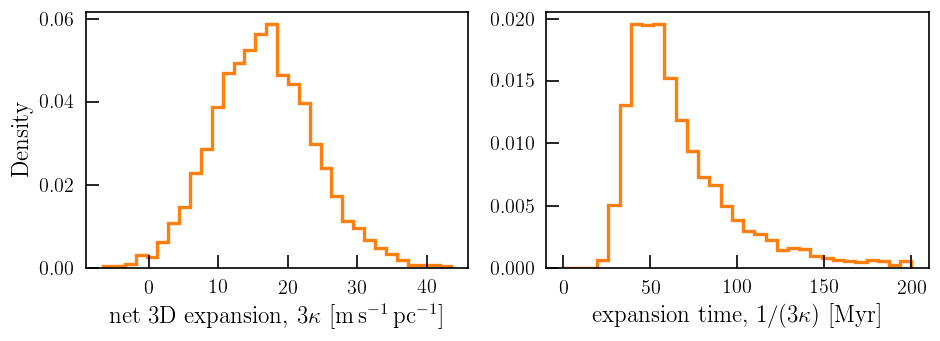

In [37]:
net_expansion_3d = azfit_dict['tails'].posterior['kappa'].stack(i=['chain','draw']).values * 3
expansion_time_Myr = 977.79222/net_expansion_3d
fig, ax = plt.subplots(1,2,figsize=(8,3))

ax[0].hist(net_expansion_3d, 32,density=True,histtype='step',color='C1', lw=2);
ax[1].hist(expansion_time_Myr, np.linspace(0,200,32),density=True, histtype='step',color='C1',lw=2);
ax[0].set_xlabel("net 3D expansion, $3\kappa$ [$\mathrm{m}\,\mathrm{s}^{-1}\,\mathrm{pc}^{-1}$]")
ax[1].set_xlabel("expansion time, $1/(3\kappa)$ [Myr]")
ax[0].set_ylabel('Density')
fig.tight_layout()

# ax[1].axvline(60, c='k')
savefig(fig, "tails_expansion")

## Membership

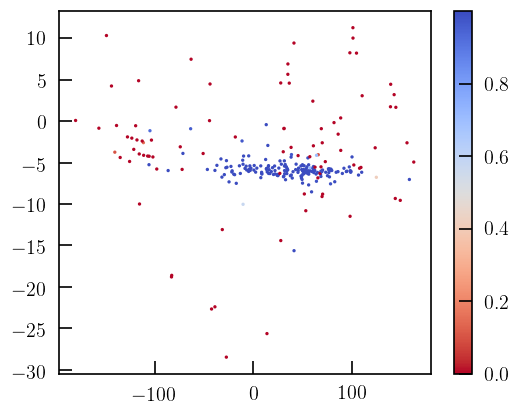

In [24]:
plt.scatter(
    df_tails["y"], df_tails["vx"], c=df_tails["mean_pmem"], s=1, cmap="coolwarm_r"
)
# plt.scatter(
#     df["gz"], df["gvz"], c=df["mean_pmem_dr2"], s=1, cmap="coolwarm_r"
# )
plt.colorbar();
# plt.ylim(-10,-4)

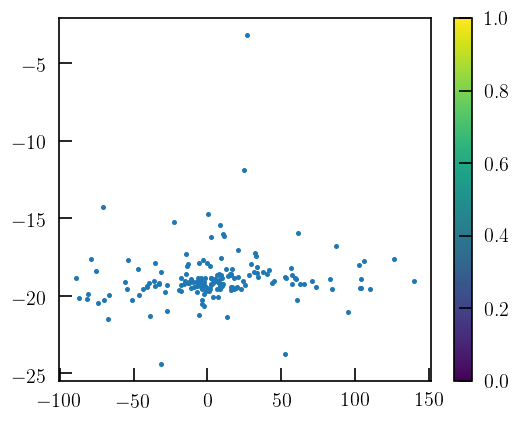

In [35]:
df_tails_mem = df_tails.groupby(df_tails['mean_pmem']>0.5).get_group(True)
plt.scatter(
    df_tails_mem["gy"], df_tails_mem["gvy"], s=4
)
# plt.scatter(
#     df["gz"], df["gvz"], c=df["mean_pmem_dr2"], s=1, cmap="coolwarm_r"
# )
plt.colorbar();
# plt.ylim(-10,-4)

In [6]:
# add mean probmem to data
def reconstruct_df_from_stanfit(stanfit):
    dat = stanfit.data
    reconstructed_df = pd.DataFrame(dict(
        parallax=dat['a'][:,0],
        pmra=dat['a'][:,1],
        pmdec=dat['a'][:,2],
        radial_velocity=np.nan,
        ra=dat['ra'],
        dec=dat['dec']))

    reconstructed_df['radial_velocity'].iloc[dat['irv']] = dat['rv']
    return reconstructed_df

def add_cartesian_xv(df):
    df["x"], df["y"], df["z"] = df.g.icrs.cartesian.xyz.value
    df["vx"], df["vy"], df["vz"] = df.g.icrs.velocity.d_xyz.value
    df["gx"], df["gy"], df["gz"] = df.g.galactic.cartesian.xyz.value
    df["gvx"], df["gvy"], df["gvz"] = df.g.galactic.velocity.d_xyz.value
    return df


df_cl = reconstruct_df_from_stanfit(fit_dict['cl'])
df_tails = reconstruct_df_from_stanfit(fit_dict['tails'])
df_cl['mean_pmem'] = fit_dict['cl']['probmem'].mean(axis=0)
df_tails['mean_pmem'] = fit_dict['tails']['probmem'].mean(axis=0)
# df['mean_pmem_harpsRV'] = fit_dict['harpsRV']['probmem'].mean(axis=0)

add_cartesian_xv(df_cl);
add_cartesian_xv(df_tails);

In [7]:
print('mean fmem = {:.3f} {:.3f}'.format(
    fit_dict['cl']['f_mem'].mean(), fit_dict['tails']['f_mem'].mean()))

print('N(mean Pmem < 0.5) = ',
      (df_cl['mean_pmem']<0.5).sum(), (df_tails['mean_pmem']<0.5).sum())

mean fmem = 0.962 0.857
N(mean Pmem < 0.5) =  9 138


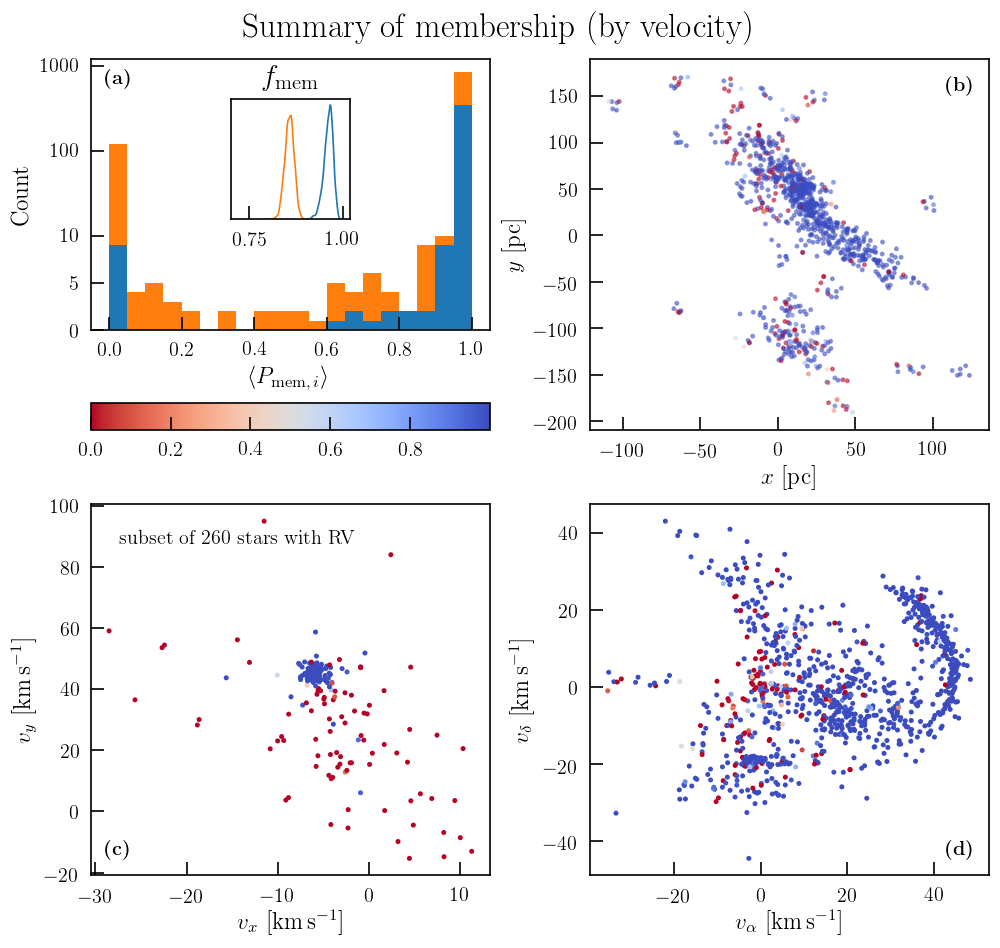

In [17]:
# Figure: summarize membership
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(
    2,
    2,
    figsize=(8.5, 8),
    gridspec_kw=dict(top=0.93, right=0.98, left=0.1, bottom=0.08, wspace=0.25),
)
fig.suptitle("Summary of membership (by velocity)", size=20)

# histogram of mean Pmem
bins = np.linspace(0, 1, 21)
ax[0, 0].hist(df_cl["mean_pmem"], bins=bins)
ax[0, 0].hist(df_tails["mean_pmem"], bins=bins, color="C1", zorder=-1)
ax[0, 0].set_yscale("symlog", linthreshy=10)
ax[0, 0].set_yticks([0, 5, 10, 100, 1000])
ax[0, 0].set_yticklabels([0, 5, 10, 100, 1000])
axins = inset_axes(
    ax[0, 0],
    width="30%",  # width = 30% of parent_bbox
    height=1.0,  # height : 1 inch
    loc=9,
    borderpad=2,
)
axins.set_title("$f_\mathrm{mem}$")
for k, f in fit_dict.items():
    sns.kdeplot(f["f_mem"], ax=axins)
axins.set_xlim(0.7, 1.02)
axins.set_yticks([])
ax[0, 0].set_xlabel(r"$\langle P_{\mathrm{mem},\,i}\rangle$")
ax[0, 0].set_ylabel("Count")

# ICRS x-y space
# hacking colorbar
paths = ax[0, 1].scatter(
    df_tails["x"],
    df_tails["y"],
    c=df_tails["mean_pmem"],
    s=4,
    cmap="coolwarm_r",
    visible=False,
)
_ = ax[0, 1].scatter(
    df_tails["x"],
    df_tails["y"],
    c=df_tails["mean_pmem"],
    s=4,
    cmap="coolwarm_r",
    alpha=0.5,
)
# Attach colorbar below histogram for better arrangement
ax1_divider = make_axes_locatable(ax[0, 0])
cax1 = ax1_divider.append_axes("bottom", size="10%", pad="27%")
cb = plt.colorbar(paths, cax=cax1, orientation="horizontal")

ax[0, 1].set_xlabel("$x$ [pc]")
ax[0, 1].set_ylabel("$y$ [pc]")


ax[1, 0].scatter(
    df_tails["vx"], df_tails["vy"], c=df_tails["mean_pmem"], s=4, cmap="coolwarm_r"
)
ax[1, 0].set_xlabel("$v_x$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 0].set_ylabel("$v_y$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 0].text(
    0.07,
    0.93,
    "subset of {} stars with RV".format(df_tails["radial_velocity"].notnull().sum()),
    transform=ax[1, 0].transAxes,
    ha="left",
    va="top",
)

ax[1, 1].scatter(
    #     out_full["parallax"],
    #     out_full["vy"],
    df_tails["pmra"] / df_tails["parallax"] * 4.74,
    df_tails["pmdec"] / df_tails["parallax"] * 4.74,
    c=df_tails["mean_pmem"],
    s=4,
    cmap="coolwarm_r",
)
# ax[1, 1].set_ylim(30, 65)
ax[1, 1].set_xlabel(r"$v_\alpha$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 1].set_ylabel(r"$v_\delta$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")

# label panels
for cax, (x, y, t) in zip(
    ax.ravel(),
    [
        (0.07, 0.93, r"\bf(a)"),
        (0.93, 0.93, r"\bf(b)"),
        (0.07, 0.07, r"\bf(c)"),
        (0.93, 0.07, r"\bf(d)"),
    ],
):
    cax.text(x, y, t, transform=cax.transAxes, va="center", ha="center")
savefig(fig, "membership_tails", rasterized=True)

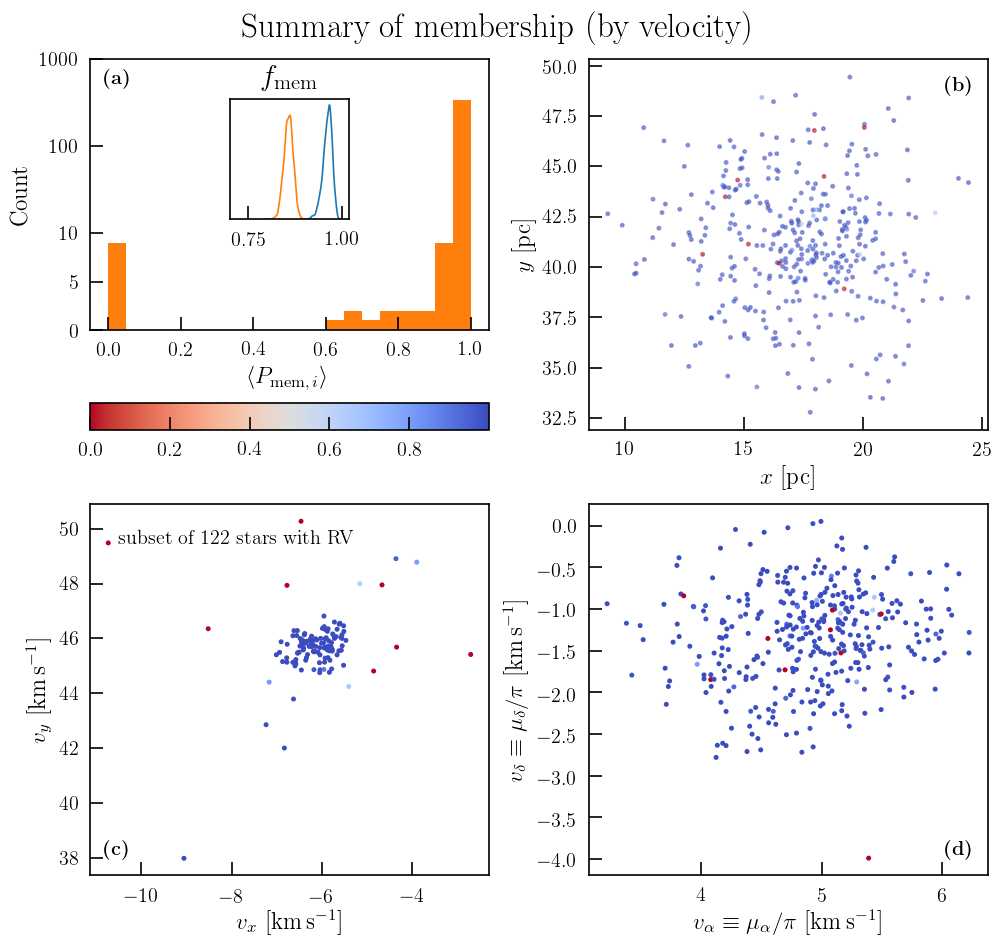

In [16]:
# Figure: summarize membership
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(
    2,
    2,
    figsize=(8.5, 8),
    gridspec_kw=dict(top=0.93, right=0.98, left=0.1, bottom=0.08, wspace=0.25),
)
fig.suptitle("Summary of membership (by velocity)", size=20)


cdf = df_cl

# histogram of mean Pmem
bins = np.linspace(0, 1, 21)
ax[0, 0].hist(cdf["mean_pmem"], bins=bins, color="C1", zorder=-1)
ax[0, 0].set_yscale("symlog", linthreshy=10)
ax[0, 0].set_yticks([0, 5, 10, 100, 1000])
ax[0, 0].set_yticklabels([0, 5, 10, 100, 1000])
axins = inset_axes(
    ax[0, 0],
    width="30%",  # width = 30% of parent_bbox
    height=1.0,  # height : 1 inch
    loc=9,
    borderpad=2,
)
axins.set_title("$f_\mathrm{mem}$")
for k, f in fit_dict.items():
    sns.kdeplot(f["f_mem"], ax=axins)
axins.set_xlim(0.7, 1.02)
axins.set_yticks([])
ax[0, 0].set_xlabel(r"$\langle P_{\mathrm{mem},\,i}\rangle$")
ax[0, 0].set_ylabel("Count")

# ICRS x-y space
# hacking colorbar
paths = ax[0, 1].scatter(
    cdf["x"],
    cdf["y"],
    c=cdf["mean_pmem"],
    s=4,
    cmap="coolwarm_r",
    visible=False,
)
_ = ax[0, 1].scatter(
    cdf["x"],
    cdf["y"],
    c=cdf["mean_pmem"],
    s=4,
    cmap="coolwarm_r",
    alpha=0.5,
)
# Attach colorbar below histogram for better arrangement
ax1_divider = make_axes_locatable(ax[0, 0])
cax1 = ax1_divider.append_axes("bottom", size="10%", pad="27%")
cb = plt.colorbar(paths, cax=cax1, orientation="horizontal")

ax[0, 1].set_xlabel("$x$ [pc]")
ax[0, 1].set_ylabel("$y$ [pc]")


ax[1, 0].scatter(
    cdf["vx"], cdf["vy"], c=cdf["mean_pmem"], s=4, cmap="coolwarm_r"
)
ax[1, 0].set_xlabel("$v_x$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 0].set_ylabel("$v_y$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 0].text(
    0.07,
    0.93,
    "subset of {} stars with RV".format(cdf["radial_velocity"].notnull().sum()),
    transform=ax[1, 0].transAxes,
    ha="left",
    va="top",
)

ax[1, 1].scatter(
    #     out_full["parallax"],
    #     out_full["vy"],
    cdf["pmra"] / cdf["parallax"],
    cdf["pmdec"] / cdf["parallax"],
    c=cdf["mean_pmem"],
    s=4,
    cmap="coolwarm_r",
)
# ax[1, 1].set_ylim(30, 65)
ax[1, 1].set_xlabel(r"$v_\alpha\equiv\mu_\alpha/\pi$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")
ax[1, 1].set_ylabel(r"$v_\delta\equiv\mu_\delta/\pi$ [$\mathrm{km}\,\mathrm{s}^{-1}$]")

# label panels
for cax, (x, y, t) in zip(
    ax.ravel(),
    [
        (0.07, 0.93, r"\bf(a)"),
        (0.93, 0.93, r"\bf(b)"),
        (0.07, 0.07, r"\bf(c)"),
        (0.93, 0.07, r"\bf(d)"),
    ],
):
    cax.text(x, y, t, transform=cax.transAxes, va="center", ha="center")
savefig(fig, "membership_cl", rasterized=True)

## DRV

In [111]:
drv.mean(axis=0)[52]

-0.3741769141872126

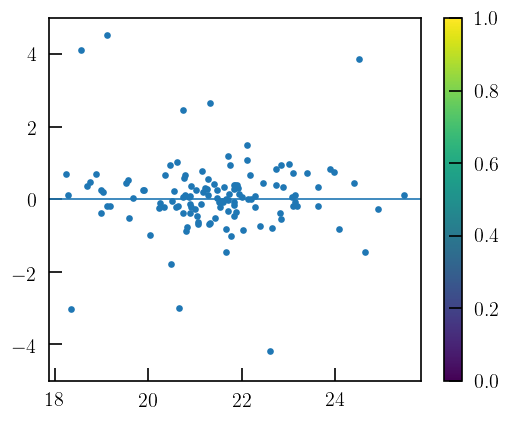

In [49]:
irv = fit_dict["dr2"].data["irv"]
drv = df["radial_velocity"].values[None, irv] - fit_dict["dr2"]["rv_model"]
patches = plt.scatter(
    df["parallax"][irv],
    drv.mean(axis=0),
#     c=df.loc[irv, "mean_pmem_dr2"],
    cmap="coolwarm",
    s=9,vmin=0,vmax=1
)
# _ = plt.scatter(
#     df["parallax"][496],
#     drv.mean(axis=0)[52],marker='s',facecolors='',edgecolors='C6'
# )
plt.errorbar(
    df["parallax"][irv], drv.mean(axis=0), #yerr=df.loc[irv, "radial_velocity_error"],
    ls="",
    c='k',zorder=-1, elinewidth=.8
)
plt.ylim(-5,5);
plt.colorbar(patches);
plt.axhline(0);

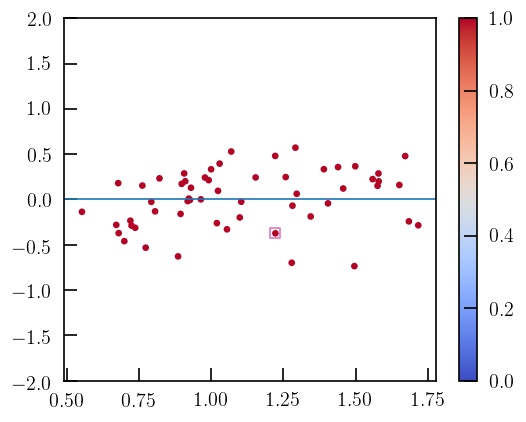

In [119]:
irv = fit_dict["harpsRV"].data["irv"]
drv = df["RV_HARPS_leao"].values[None, irv] - fit_dict["harpsRV"]["rv_model"]
patches = plt.scatter(
    df["bp_rp"][irv],
    drv.mean(axis=0),
    c=df.loc[irv, "mean_pmem_harpsRV"],
    cmap="coolwarm",
    s=9,vmin=0,vmax=1
)
_ = plt.scatter(
    df["bp_rp"][496],
    drv.mean(axis=0)[52],marker='s',facecolors='',edgecolors='C6'
)
plt.errorbar(
    df["bp_rp"][irv], drv.mean(axis=0), yerr=df.loc[irv, "eRV_HARPS_leao"], ls="",
    c='k',zorder=-1, elinewidth=.8
)
plt.ylim(-2,2);
plt.colorbar(patches);
plt.axhline(0)

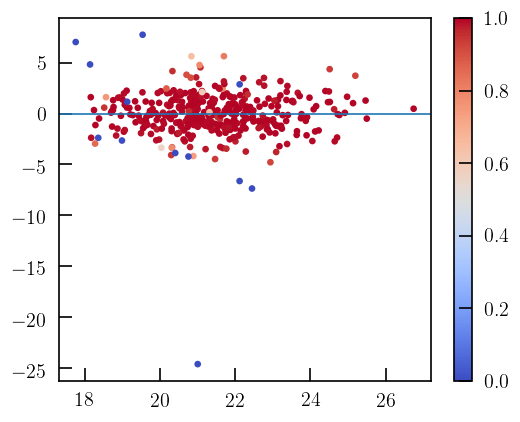

In [52]:

drv = df["pmdec"].values[None] - fit_dict["dr2"]["a_model"][:,:,2]
patches = plt.scatter(
    df["parallax"],
    drv.mean(axis=0),
    c=df["mean_pmem_dr2"],
    cmap="coolwarm",
    s=9,vmin=0,vmax=1
)
# _ = plt.scatter(
#     df["parallax"][496],
#     drv.mean(axis=0)[52],marker='s',facecolors='',edgecolors='C6'
# )
plt.errorbar(
    df["parallax"], drv.mean(axis=0), #yerr=df["pmdec_error"],
    ls="",
    c='k',zorder=-1, elinewidth=.8
)
# plt.ylim(-2,2);
plt.colorbar(patches);
plt.axhline(0)

In [106]:
np.where(irv==496)

(array([52]),)

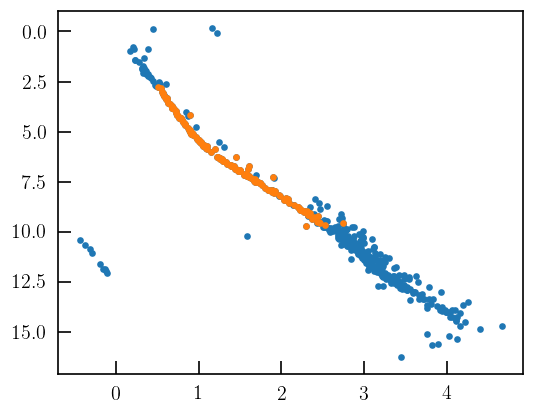

In [124]:
fig, ax = plt.subplots()
irv = fit_dict["dr2"].data["irv"]
ax.scatter(df['bp_rp'],df['phot_g_mean_mag']+df.g.distmod,s=9);
ax.scatter(df.loc[irv,'bp_rp'],df.loc[irv,'phot_g_mean_mag']+df.loc[irv].g.distmod,s=9);
# ax.scatter(df.loc[irv,'bp_rp'],df.loc[irv,'phot_g_mean_mag']+df.loc[irv].g.distmod,s=9);
ax.invert_yaxis()

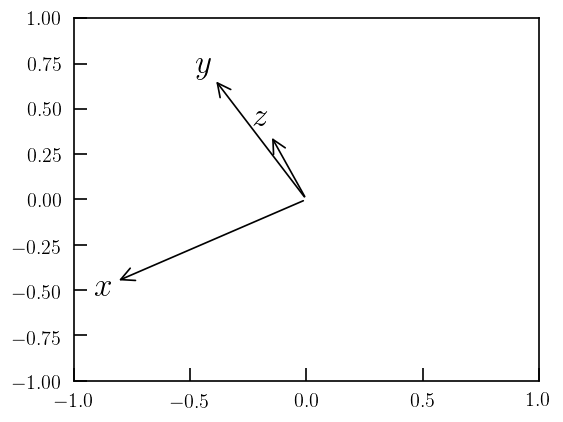

In [8]:

# annotate Galactic frame projected onto ICRS
unitv_gal_in_icrs = coord.Galactic(
    [1, 0, 0], [0, 1, 0], [0, 0, 1], representation_type="cartesian"
).transform_to(coord.ICRS).cartesian

xaxis, yaxis = 'y','z'
for i,axis in enumerate(['x','y','z']):
#     plt.plot([0,unitv_gal_in_icrs[i].x],[0,unitv_gal_in_icrs[i].y],label=axis,)
    dxdy = [getattr(unitv_gal_in_icrs[i], xaxis), getattr(unitv_gal_in_icrs[i], yaxis)]
    # using arrow and text
#     plt.arrow(*[0,0], *dxdy,
#               color='k',lw=1,)
#     plt.text(*dxdy, axis,)
    # using annotate
    ann = plt.annotate('${}$'.format(axis),
                      xy=[0,0], xycoords='data',
                      xytext=dxdy, textcoords='data',
                      size=20, va="center", ha="center",
#                       bbox=dict(boxstyle="round4", fc="w"),
                      arrowprops=dict(arrowstyle="<-"),
                      )
plt.axis([-1,1,-1,1]);

<ErrorbarContainer object of 3 artists>

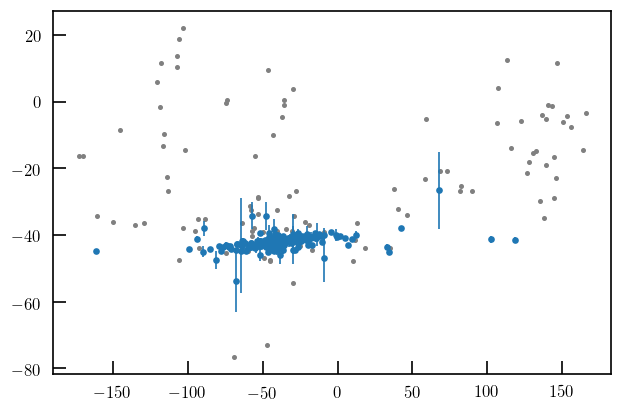

In [227]:
plt.figure(dpi=120)
plt.scatter(out_full["gx"], out_full["gvx"], s=4, c="0.5")
plt.scatter(out_full["gx"][mem], out_full["gvx"][mem], s=9)
plt.errorbar(
    out_full["gx"][mem],
    out_full["gvx"][mem],
    out_full["radial_velocity_error"][mem],
    ls="",
)

## checking RUWE

In [153]:
from wsdb import wsdb

# wsdb.upload_df(out_full[["source_id"]], "hyfull")

ruwe = wsdb.query(
    """select ruwe.source_id, ruwe
from semyeong_oh.hyfull as d left join gaia_dr2.ruwe on d.source_id=gaia_dr2.ruwe.source_id;"""
)

out_full_ruwe = out_full.merge(ruwe, on="source_id")

In [ ]:
out_full.columns

In [169]:
bad_astrometry = (out_full_ruwe['ruwe']>1.4)# | (out_full_ruwe['duplicated_source'])
print(bad_astrometry.sum())

127


In [162]:
out_full_ruwe.groupby(
    by=[out_full_ruwe["ruwe"] > 1.4, out_full_ruwe["duplicated_source"]]
)["source_id"].count()

ruwe   duplicated_source
False  False                1114
       True                  148
True   False                 117
       True                   10
Name: source_id, dtype: int64

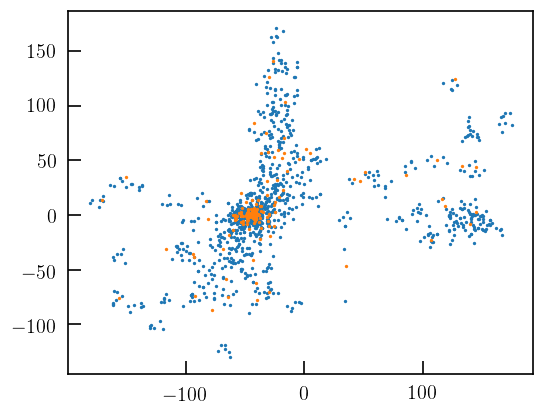

In [174]:
fig, ax = plt.subplots()
for l, g in out_full_ruwe.groupby('duplicated_source'):
    ax.scatter(g['gx'],g['gy'],s=1);

In [156]:
grp_by_pmem = out_full_ruwe.groupby(pd.cut(out_full_ruwe['mean_pmem_all'], [0., 0.5, 0.9, 1]))
grp_by_pmem[['duplicated_source']].describe()

duplicated_source                    
                          count unique    top  freq
mean_pmem_all                                      
(0.0, 0.5]                  199      2  False   183
(0.5, 0.9]                   42      2  False    40
(0.9, 1.0]                 1146      2  False  1006

In [414]:
out_full_ruwe["ruwe"].describe()

count    1389.000000
mean        1.235694
std         0.842037
min         0.725516
25%         1.008400
50%         1.089720
75%         1.203340
max        16.823600
Name: ruwe, dtype: float64

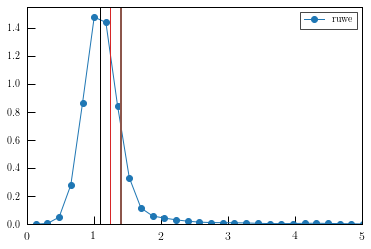

In [428]:
sns.kdeplot(out_full_ruwe["ruwe"], marker="o")
plt.xlim(0, 5)
plt.axvline(out_full_ruwe["ruwe"].median(), c="k")
plt.axvline(out_full_ruwe["ruwe"].mean(), c="C3")
plt.axvline(1.4, c="C5", lw=2);